# Exponentially weighted moving PCA

In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.decomposition

In [3]:
import xpca

In [4]:
first_year = 2008; last_year = 2020

In [5]:
df = pd.read_parquet('../data/equity_indices.parquet')

In [6]:
df = df[str(first_year):str(last_year)]

In [7]:
df.head()

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
Datetime,,,,,,,,,
2008-01-01 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001823
2008-01-01 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000383
2008-01-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000671
2008-01-01 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000862
2008-01-01 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001821


In [8]:
df.tail()

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
Datetime,,,,,,,,,
2020-12-31 12:00:00,0.0,0.001415,0.001830,0.0,0.0,0.001778,0.000304,0.0,0.001128
2020-12-31 13:00:00,0.0,-0.000336,-0.000652,0.0,0.0,-0.000702,-0.000609,0.0,-0.000398
2020-12-31 14:00:00,0.0,0.002895,0.002132,0.0,0.0,0.002030,0.001827,0.0,0.003115
2020-12-31 15:00:00,0.0,0.002819,-0.002171,0.0,0.0,0.002182,-0.001216,0.0,0.002941
2020-12-31 16:00:00,0.0,0.001138,0.002785,0.0,0.0,0.001030,0.002080,0.0,0.000461


In [9]:
xs = df.values

In [10]:
classical_pca = sklearn.decomposition.PCA()

In [11]:
classical_pca.fit(xs)

PCA()

In [12]:
zs_classical = classical_pca.transform(xs)

In [13]:
ewmpca = xpca.EWMPCA(alpha=.9305)

In [14]:
zs_ewmpca = ewmpca.add_all(xs)

Processing data point 1000
Processing data point 2000
Processing data point 3000
Processing data point 4000
Processing data point 5000
Processing data point 6000
Processing data point 7000
Processing data point 8000
Processing data point 9000
Processing data point 10000
Processing data point 11000
Processing data point 12000
Processing data point 13000
Processing data point 14000
Processing data point 15000
Processing data point 16000
Processing data point 17000
Processing data point 18000
Processing data point 19000
Processing data point 20000
Processing data point 21000
Processing data point 22000
Processing data point 23000
Processing data point 24000
Processing data point 25000
Processing data point 26000
Processing data point 27000
Processing data point 28000
Processing data point 29000
Processing data point 30000
Processing data point 31000
Processing data point 32000
Processing data point 33000
Processing data point 34000
Processing data point 35000
Processing data point 36000
P

In [15]:
cross_cov = np.cov(zs_classical, zs_ewmpca, rowvar=False)

In [16]:
ticklabels = [f'Classical PC{i+1}' for i in range(np.shape(zs_classical)[1])]
ticklabels.extend([f'EWM PC{i+1}' for i in range(np.shape(zs_classical)[1])])

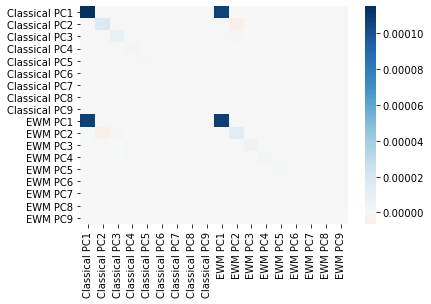

In [17]:
ax = sns.heatmap(cross_cov, center=0., cmap='RdBu')
ax.set_xticklabels(ticklabels)
ax.set_yticklabels(ticklabels)
ax.tick_params(axis='x', rotation=90)